In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew
from subprocess import check_output

In [2]:
# loading our data file

df = pd.read_csv(r'C:\Users\Lenovo\Desktop\python\BI Medical project\Medical Retail Final CSV.csv')

In [3]:
# let's have a look at our dataframe ---

df.head()

,Customer id,App User,Covid19 Medicine Sales,Other Medicine Sales,Redeemed points Flag,Transactions,last transaction date,DOB,EMAIL Flag,Gender
0,863268612,1,"22,035",-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,"3,926","4,099",No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,"8,031",-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,"8,046",-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,"8,046",-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank


In [4]:
# this shows information about our dataframe

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65968 entries, 0 to 65967
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer id               65968 non-null  int64 
 1   App User                  65968 non-null  int64 
 2    Covid19 Medicine Sales   65968 non-null  object
 3    Other Medicine Sales     65968 non-null  object
 4    Redeemed points Flag     65968 non-null  object
 5   Transactions              65968 non-null  int64 
 6    last transaction date    65968 non-null  object
 7    DOB                      65968 non-null  object
 8    EMAIL Flag               65968 non-null  object
 9    Gender                   65968 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.0+ MB


In [5]:
# let's look at our column names

df.columns

Index(['Customer id', 'App User', ' Covid19 Medicine Sales ',
       ' Other Medicine Sales ', ' Redeemed points Flag ', 'Transactions',
       ' last transaction date ', ' DOB ', ' EMAIL Flag ', ' Gender '],
      dtype='object')

In [6]:
# We see that our columns have leading and trailing spaces
# Let's remove those unnecessary spaces

df.columns = df.columns.str.replace(' ', '')

In [7]:
df.columns

Index(['Customerid', 'AppUser', 'Covid19MedicineSales', 'OtherMedicineSales',
       'RedeemedpointsFlag', 'Transactions', 'lasttransactiondate', 'DOB',
       'EMAILFlag', 'Gender'],
      dtype='object')

In [8]:
# We must also remove commas from Covid19MedicineSales and OtherMedicineSales column, so that we could convert them to float
# If not done so, would result into error saying can't convert str to float

In [9]:
df['Covid19MedicineSales'] = df['Covid19MedicineSales'].str.replace(',','')

In [10]:
df['OtherMedicineSales'] = df['OtherMedicineSales'].str.replace(',','')

In [11]:
df.head()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender
0,863268612,1,22035,-,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,3926,4099,No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,8031,-,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,8046,-,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,8046,-,No,4,18-11-2021,00-01-1900,NO EMAIL,blank


In [12]:
# we also notice that datatype of our covid19 sales and other sales columns are of object type
# let's change the datatype to int or float, in order to obtain the total sales aka Target sales 

df['Covid19MedicineSales'] = pd.to_numeric(df['Covid19MedicineSales'], errors="coerce")

In [13]:
df['OtherMedicineSales'] = pd.to_numeric(df['OtherMedicineSales'], errors="coerce")

In [14]:
# Let's datatypes of columns now --

df.dtypes

Customerid                int64
AppUser                   int64
Covid19MedicineSales    float64
OtherMedicineSales      float64
RedeemedpointsFlag       object
Transactions              int64
lasttransactiondate      object
DOB                      object
EMAILFlag                object
Gender                   object
dtype: object

In [15]:
df.head()

# We have now converted both columns to flaot datatype
# Due to this all null values are now shown as NaN

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender
0,863268612,1,22035.0,NaN,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,3926.0,4099.0,No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,8031.0,NaN,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,8046.0,NaN,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,8046.0,NaN,No,4,18-11-2021,00-01-1900,NO EMAIL,blank


In [16]:
# let's check if there are any null values in our column

df.isnull().sum()

Customerid                  0
AppUser                     0
Covid19MedicineSales     5749
OtherMedicineSales      28892
RedeemedpointsFlag          0
Transactions                0
lasttransactiondate         0
DOB                         0
EMAILFlag                   0
Gender                      0
dtype: int64

# Imputing Missing Values

In [17]:
# There are many null values in our dataset
# We must clean the data

# We also know that from our problem statement that the user would buy either the covid19medicine or the other medicine
# This means that null values in a particular column can be replaced as zero

df['Covid19MedicineSales'] = df['Covid19MedicineSales'].fillna(0)
df['OtherMedicineSales'] = df['OtherMedicineSales'].fillna(0)

In [18]:
df.isnull().sum() 

# we have replaced all null values with zeros

Customerid              0
AppUser                 0
Covid19MedicineSales    0
OtherMedicineSales      0
RedeemedpointsFlag      0
Transactions            0
lasttransactiondate     0
DOB                     0
EMAILFlag               0
Gender                  0
dtype: int64

In [19]:
# lets check our dataframe

df.head()

# Our data is now clean

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender
0,863268612,1,22035.0,0.0,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female
1,389739561,0,3926.0,4099.0,No,4,25-11-2021,00-01-1900,NO EMAIL,blank
2,446950605,0,8031.0,0.0,No,4,11-10-2021,00-01-1900,NO EMAIL,blank
3,819143842,0,8046.0,0.0,No,4,28-06-2021,00-01-1900,NO EMAIL,blank
4,530569572,0,8046.0,0.0,No,4,18-11-2021,00-01-1900,NO EMAIL,blank


In [20]:
ls = [] #empty list

for i in df.AppUser:
    if i == 1:
        ls.append('App')
    else:
        ls.append('Store')
        

# We are creating a new column in our dataframe where we could easily check if the user has made an order from store or the app
df['Ordered_from'] = ls    

In [21]:
df.head()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender,Ordered_from
0,863268612,1,22035.0,0.0,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female,App
1,389739561,0,3926.0,4099.0,No,4,25-11-2021,00-01-1900,NO EMAIL,blank,Store
2,446950605,0,8031.0,0.0,No,4,11-10-2021,00-01-1900,NO EMAIL,blank,Store
3,819143842,0,8046.0,0.0,No,4,28-06-2021,00-01-1900,NO EMAIL,blank,Store
4,530569572,0,8046.0,0.0,No,4,18-11-2021,00-01-1900,NO EMAIL,blank,Store


In [86]:
# Converting OtherMedicineSales column to integer

df['OtherMedicineSales'] = df['OtherMedicineSales'].astype('int64')

In [87]:
# Converting Covid19MedicineSales column to integer

df['Covid19MedicineSales'] = df['Covid19MedicineSales'].astype('int64')

In [88]:
df[['OtherMedicineSales']].sum()

OtherMedicineSales    4545913994
dtype: int64

In [89]:
df[['Covid19MedicineSales']].sum()

Covid19MedicineSales    1345566675
dtype: int64

# Bi-variate Analysis :

In [26]:
# Now we can Covid19MedicineSales and OtherMedicineSales to create a Target or Total sales column

df['total_sales'] = df['Covid19MedicineSales'] + df['OtherMedicineSales']

In [27]:
# let's check our sales column

df.head()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender,Ordered_from,total_sales
0,863268612,1,22035,0,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female,App,22035
1,389739561,0,3926,4099,No,4,25-11-2021,00-01-1900,NO EMAIL,blank,Store,8025
2,446950605,0,8031,0,No,4,11-10-2021,00-01-1900,NO EMAIL,blank,Store,8031
3,819143842,0,8046,0,No,4,28-06-2021,00-01-1900,NO EMAIL,blank,Store,8046
4,530569572,0,8046,0,No,4,18-11-2021,00-01-1900,NO EMAIL,blank,Store,8046


In [28]:
# Now lets create an average sales column :
# we know that Transactions column is an int dtype

df['avg_sales'] = df['total_sales'] / df['Transactions']

In [29]:
# lets round the values upto 2 decimal places

df['avg_sales'] = df['avg_sales'].round(decimals = 2)


In [83]:
df['total_sales'] = df['total_sales'].astype('int64')

In [82]:
df['avg_sales'] = df['avg_sales'].astype('int64')

In [32]:
# lets check it

df.head()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender,Ordered_from,total_sales,avg_sales
0,863268612,1,22035,0,No,11,12-11-2021,00-01-1900,EMAIL PRESENT,female,App,22035,2003
1,389739561,0,3926,4099,No,4,25-11-2021,00-01-1900,NO EMAIL,blank,Store,8025,2006
2,446950605,0,8031,0,No,4,11-10-2021,00-01-1900,NO EMAIL,blank,Store,8031,2007
3,819143842,0,8046,0,No,4,28-06-2021,00-01-1900,NO EMAIL,blank,Store,8046,2011
4,530569572,0,8046,0,No,4,18-11-2021,00-01-1900,NO EMAIL,blank,Store,8046,2011


In [33]:
# This shows that there are only 2101 correct dates of birth, while most of rest are system generated only.

df['DOB'].nunique()

2101

In [34]:
# we have all unique customerids

df['Customerid'].nunique()

65967

# Generating few insights based on gender

In [35]:
df[['Gender']].value_counts()

Gender
blank     48297
female    13899
male       3772
dtype: int64

- We can see that major number of opur customer have not shared their gender information

- Whereas, those who shared are less than 50% of our customers

- We also see that male users are just 27% of female users

In [36]:
df.groupby(['Gender'])[['total_sales']].mean().round()

,total_sales
Gender,
blank,67589.0
female,146689.0
male,155970.0


In [37]:
df.groupby(['Gender'])[['avg_sales']].mean().round()

,avg_sales
Gender,
blank,26376.0
female,24369.0
male,30540.0


- After noticing the above insights, we know that Male customers are the ones, we should majorly focus on.

In [38]:
# Here we get to know gender wise orders that were made from App or store

df.groupby(['Gender','Ordered_from'])[['Ordered_from']].count()

Ordered_from
Gender Ordered_from              
blank  App                      9
       Store                48288
female App                  12973
       Store                  926
male   App                   3578
       Store                  194

In [39]:
df.groupby("Gender").sum().sort_values("total_sales", ascending=False).astype('int64').head()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,Transactions,total_sales,avg_sales
Gender,,,,,,,
blank,22097725129625,9,908553913,2355781058,133658,3264334971,1273880701
female,6394277788955,12973,312426157,1726398913,77276,2038825070,338704405
male,1731600531657,3578,124586605,463734023,20341,588320628,115195661


In [40]:
# Let's check for skewness 

df.skew(axis = 0, skipna = True)

Customerid               0.101642
AppUser                  1.148392
Covid19MedicineSales    49.993116
OtherMedicineSales      46.553232
Transactions            12.645049
total_sales             45.862194
avg_sales               21.192816
dtype: float64

In [41]:
# if needed we could also create a column using this --
# The column would contain the number of days since the last transaction was made
# This would give us an insight about our active/regular users

pd.to_datetime(df['lasttransactiondate'], errors = 'ignore').rsub(pd.Timestamp('now').floor('d')).dt.days

0        442
1        458
2        473
3        608
4        465
        ... 
65963    444
65964    464
65965    627
65966    517
65967    801
Name: lasttransactiondate, Length: 65968, dtype: int64

# -------------------------------------------------------------------------------------------------

# Answering a few questions ---

# Q.1. Total sales of medicines - 5891480669

In [42]:
df[['total_sales']].sum() # total sales 

total_sales    5891480669
dtype: int64

# Q.2. Total number of Orders -

In [43]:
# Total number of orders fulfilled

df[['Transactions']].sum()

Transactions    231275
dtype: int64

# Q.3. Average transaction value

In [44]:
df[df['avg_sales']>2000].mean().astype(int)

Customerid              458155521
AppUser                         0
Covid19MedicineSales        20397
OtherMedicineSales          68910
Transactions                    3
total_sales                 89308
avg_sales                   26191
dtype: int32

In [45]:
df['avg_sales'].mean()

26191.1952310211

# Q.4. Highest sale generating customer

In [46]:
df.groupby('Customerid').agg({'total_sales': 'max'}).sort_values(by='total_sales', ascending=False).iloc[:1]

,total_sales
Customerid,
58583079,28912831


# Q.5. Customer who made highest number of transactions -"Loyal Customer"

In [47]:
df.groupby('Customerid').agg({'Transactions': 'max'}).sort_values(by='Transactions', ascending=False).iloc[:1]

,Transactions
Customerid,
132289856,268


# Q.6. Find if the loyal customer has used his loyalty points and if he/she is an app user

In [95]:
loyal_cus = df.groupby('Customerid').agg({'Transactions': 'max'}).sort_values(by='Transactions', ascending=False).iloc[:1]

In [99]:
loyal_cus.index[0]

132289856

In [100]:
df.loc[df['Customerid']== loyal_cus.index[0]]

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,RedeemedpointsFlag,Transactions,lasttransactiondate,DOB,EMAILFlag,Gender,Ordered_from,total_sales,avg_sales,day_of_week
25186,132289856,1,4294,3020320,No,268,2021-11-28,22-09-1993,EMAIL PRESENT,male,App,3024614,11285,Sunday


In [101]:
df.loc[df['Customerid']== loyal_cus.index[0]][['RedeemedpointsFlag']]

,RedeemedpointsFlag
25186,No


# Q.7. Total sales volume from app users

In [105]:
df.groupby('Ordered_from').agg({'total_sales': 'sum'}).iloc[:1]

,total_sales
Ordered_from,
App,2485257220


In [104]:
df['total_sales'].sum()

5891480669

# Q.8. Number of transactions from app users

In [103]:
((df.groupby('Ordered_from').agg({'Transactions': 'count'}).iloc[:1]/df['Transactions'].count())*100).round(2)

,Transactions
Ordered_from,
App,25.1


# Q9) What is the most frequently occurring average transaction value (Correct to 0 decimal places ?


In [106]:
df[['avg_sales']].mode()

,avg_sales
0,8458


# Q1O) What percentage of customer's Genders have been captured in overall data (Calculate to O decimal places


In [53]:
(df['Gender'].value_counts(normalize=True) * 100).round()

blank     73.0
female    21.0
male       6.0
Name: Gender, dtype: float64

# Q11) What percentage of customer's Emails have been captured in overall data (Calculate to 1 decimal places


In [54]:
(df['EMAILFlag'].value_counts(normalize=True) * 100).round(1)

NO EMAIL         56.4
EMAIL PRESENT    43.6
Name: EMAILFlag, dtype: float64

# Q12) What percentage of customer's Birthdates have been captured in overall data (Calculate to 1 decimal places


In [120]:
(df['DOB'].value_counts(normalize=True) * 100).round(1)

00-01-1900    96.4
05-12-1983     0.0
23-01-1980     0.0
03-03-1970     0.0
20-08-1987     0.0
              ... 
07-09-1979     0.0
10-12-1980     0.0
12-09-1983     0.0
11-06-1989     0.0
17-10-1966     0.0
Name: DOB, Length: 2101, dtype: float64

In [119]:
(df['DOB'].value_counts(normalize=True) * 100).round(1).iloc[0]

# Thus we know that 96.4% dates of birth are system generated

96.4

# Q13) Find out the contribution percentage of sale from Covid related medicines to total revenue

In [56]:
((df['Covid19MedicineSales'].sum() / df['total_sales'].sum())*100).round(2)

22.84

# Q14) What percent of all customers use App

In [57]:
((df.groupby('Ordered_from').agg({'Customerid': 'count'}).iloc[:1] / df['Customerid'].count())*100).round(2)

,Customerid
Ordered_from,
App,25.1


# --------------------------------------------------------------------------------------------------------------

# let's plot some charts

<AxesSubplot:>

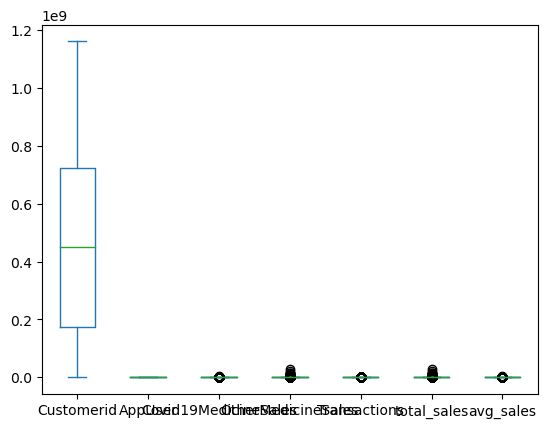

In [58]:
df.plot(kind='box')

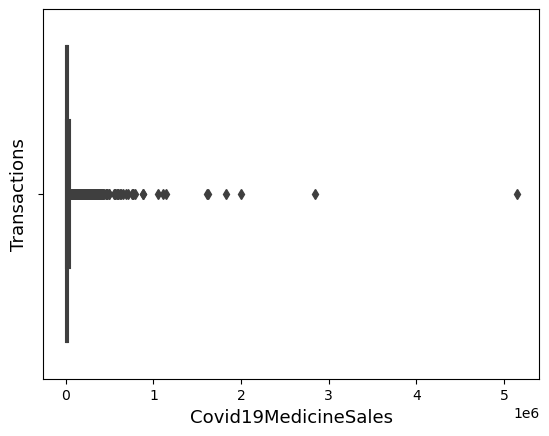

In [59]:
# Create Subplots
fig, ax = plt.subplots()

#create scatter plots
sns.boxplot(x = df['Covid19MedicineSales'])

plt.ylabel('Transactions',fontsize=13)
plt.xlabel('Covid19MedicineSales',fontsize=13)
plt.show()

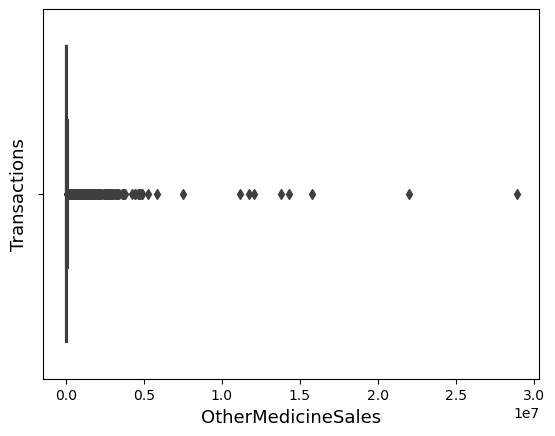

In [60]:
# Create Subplots
fig, ax = plt.subplots()

#create scatter plots
sns.boxplot(x = df['OtherMedicineSales'])

plt.ylabel('Transactions',fontsize=13)
plt.xlabel('OtherMedicineSales',fontsize=13)
plt.show()

# Count plot

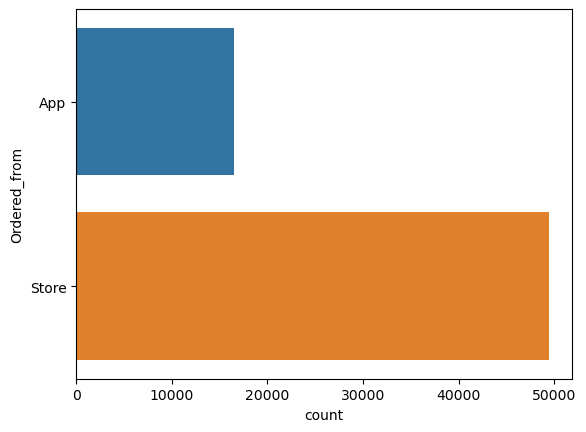

In [61]:
# count plot on single categorical variable
sns.countplot(y =df['Ordered_from'], data = df)
 
# Show the plot
plt.show()

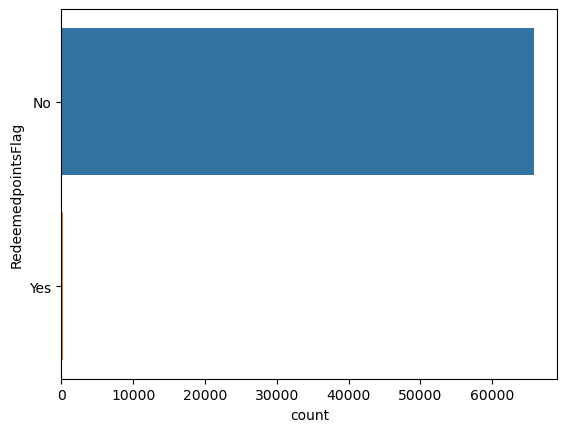

In [62]:
# count plot on single categorical variable
sns.countplot(y =df['RedeemedpointsFlag'], data = df)
 
# Show the plot
plt.show()

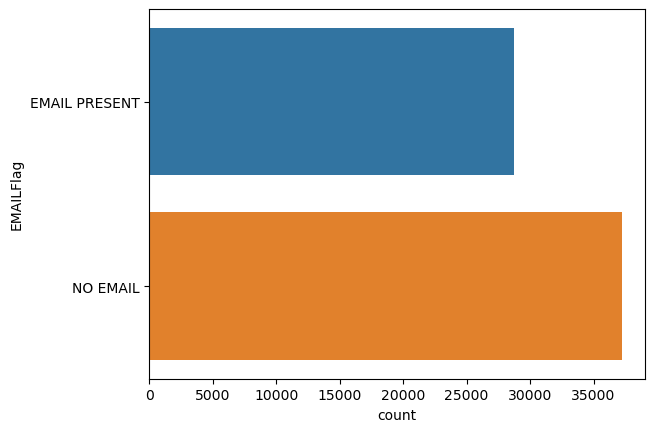

In [63]:
# count plot on single categorical variable
sns.countplot(y =df['EMAILFlag'], data = df)
 
# Show the plot
plt.show()

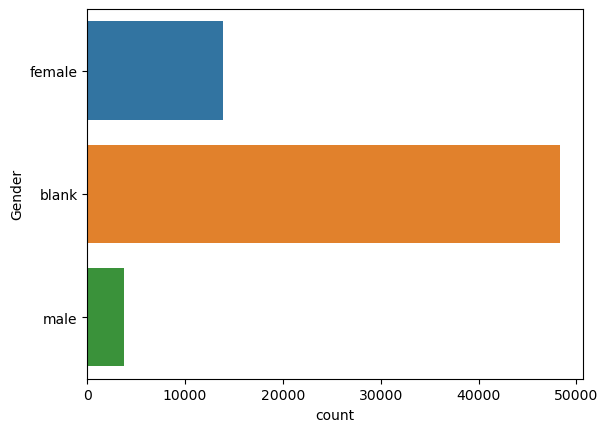

In [64]:
# count plot on single categorical variable
sns.countplot(y =df['Gender'], data = df)
 
# Show the plot
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Scatterplot to check outliers

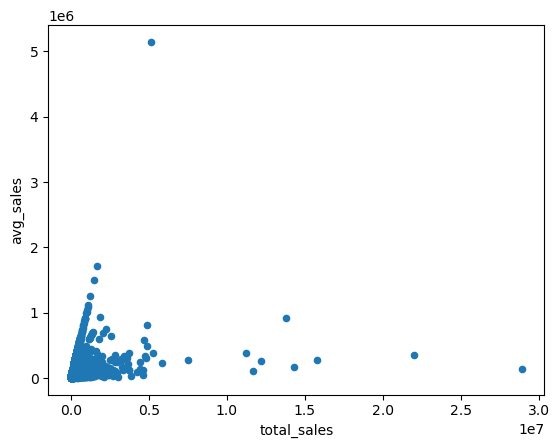

In [65]:
df.plot(kind = 'scatter', x = 'total_sales', y = 'avg_sales')

plt.show()

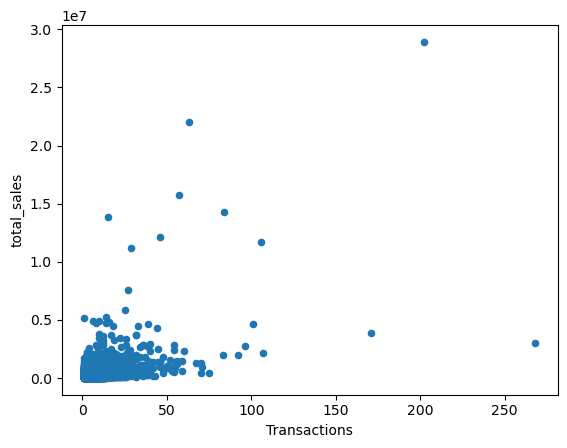

In [66]:
df.plot(kind = 'scatter', x = 'Transactions', y = 'total_sales')

plt.show()

# ------------------------------------------------------------------------------------------------------------

# Bar charts

<AxesSubplot:xlabel='Ordered_from'>

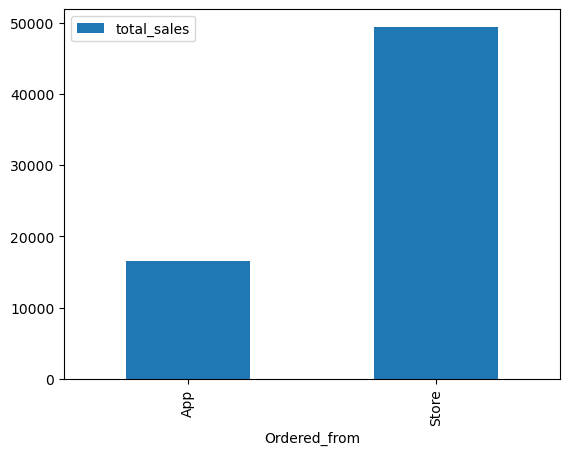

In [67]:
df[['Ordered_from', 'total_sales']].groupby('Ordered_from').count().plot.bar()

array([[<AxesSubplot:title={'center':'Customerid'}>,
        <AxesSubplot:title={'center':'AppUser'}>,
        <AxesSubplot:title={'center':'Covid19MedicineSales'}>],
       [<AxesSubplot:title={'center':'OtherMedicineSales'}>,
        <AxesSubplot:title={'center':'Transactions'}>,
        <AxesSubplot:title={'center':'total_sales'}>],
       [<AxesSubplot:title={'center':'avg_sales'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

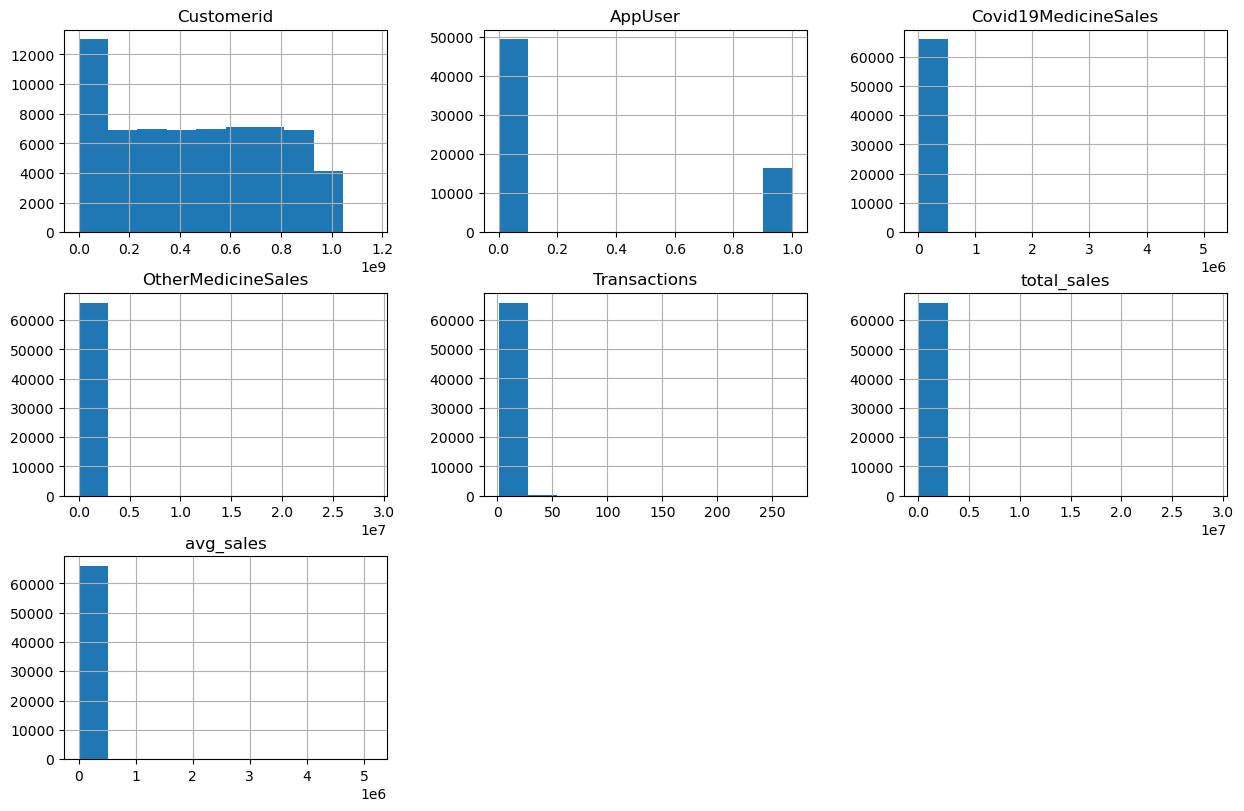

In [68]:
df.hist(figsize=(15,30),layout=(9,3))

# ------------------------------------------------------------------------------------------------------------

In [69]:
# Changing datatype of lasttransactiondate

df['lasttransactiondate'] = pd.to_datetime(df['lasttransactiondate'])

In [70]:
# Creating a new column to show the day of the week
df['day_of_week'] = df['lasttransactiondate'].dt.day_name()

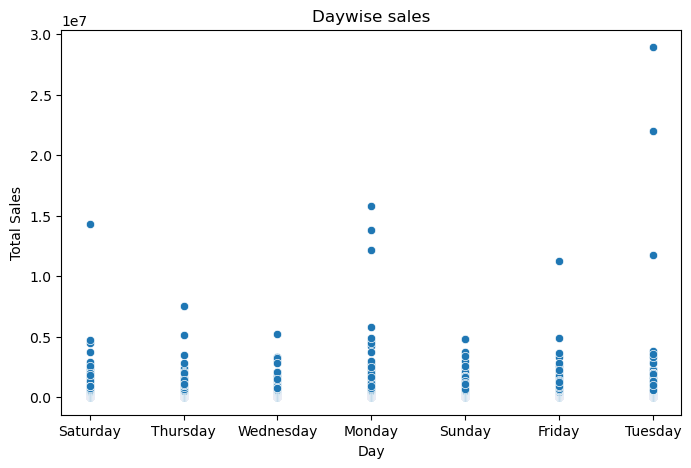

In [71]:
plt.figure(figsize=(8,5))
plt.title('Daywise sales')
plt.xlabel('Day')
plt.ylabel('Total Sales')
sns.scatterplot(df['day_of_week'],df['total_sales'])
plt.show()

# ------------------------------------------------------------------------------------------------------------

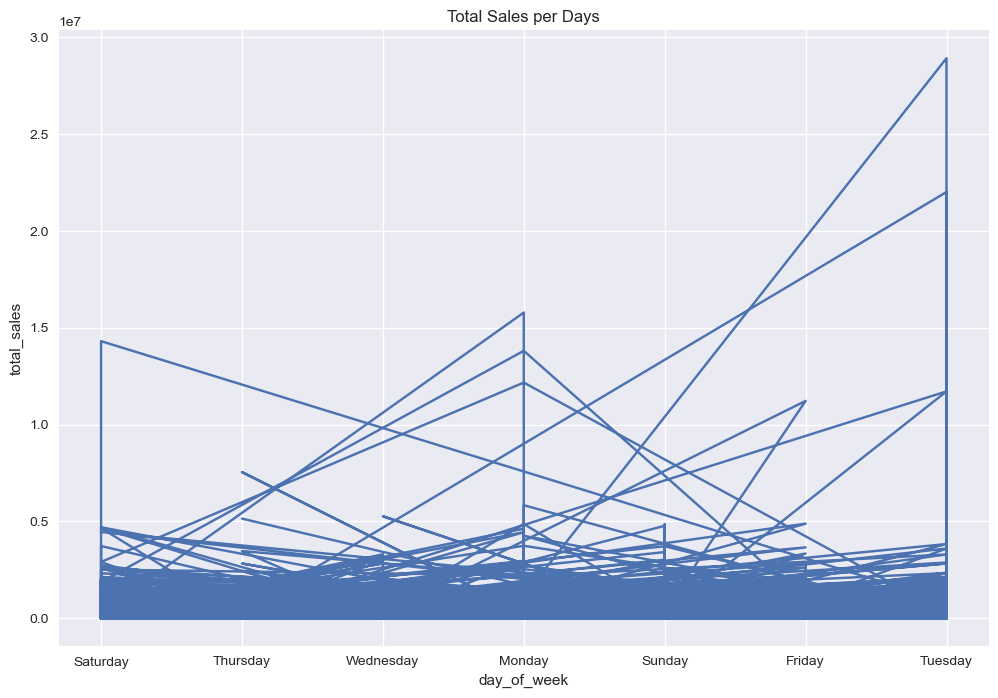

In [72]:
plt.style.use('seaborn') # matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)


x = df['day_of_week']
mu = 0
sigma = 1
y = df['total_sales']

plt.xlabel('day_of_week')
plt.ylabel('total_sales')
plt.title('Total Sales per Days')

plt.plot(x, y);

# ------------------------------------------------------------------------------------------------------------

# Density plot :

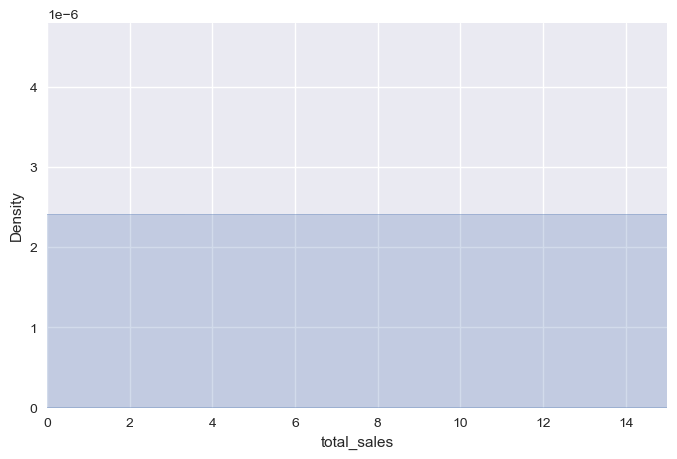

In [73]:
plt.figure(figsize=(8,5))
plt.xlim(0,15)
plt.xlabel('total_sales')
plt.ylabel('Density')
sns.kdeplot(df['total_sales'],shade=True)
plt.show()

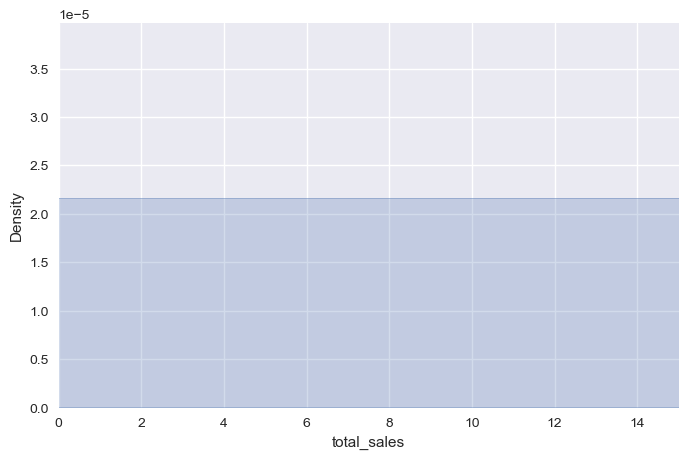

In [74]:
plt.figure(figsize=(8,5))
plt.xlim(0,15)
plt.xlabel('total_sales')
plt.ylabel('Density')
sns.kdeplot(df['avg_sales'],shade=True)
plt.show()

# ------------------------------------------------------------------------------------------------------------

# Comparing means

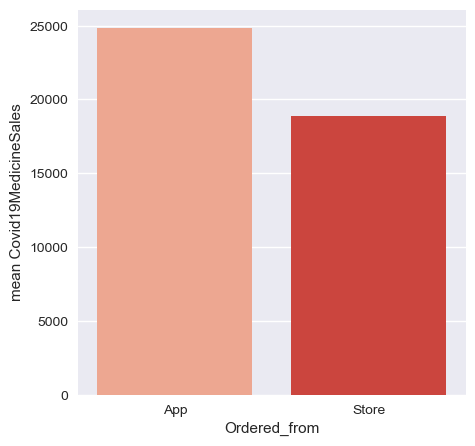

In [75]:
# Comparing mean qtime penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'Ordered_from','Covid19MedicineSales')

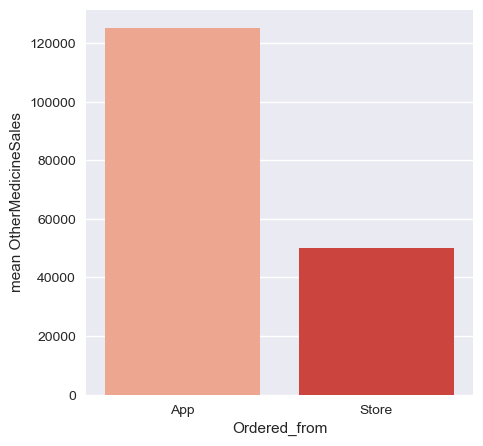

In [76]:
# Comparing mean qtime penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'Ordered_from','OtherMedicineSales')

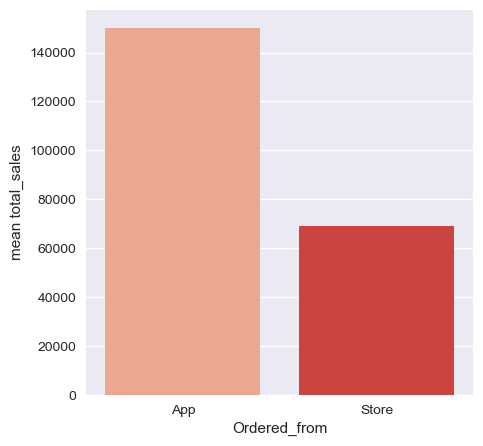

In [77]:
# Comparing mean qtime penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'Ordered_from','total_sales')

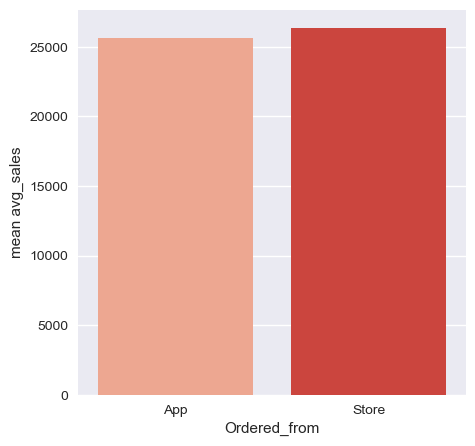

In [78]:
# Comparing mean qtime penalty paid against each type of customer

def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(5,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

compare_means(df,'Ordered_from','avg_sales')

# -------------------------------------------------------------------------------------------------------------

# Multi-variate Analysis :

- Correlation

In [79]:
df.corr()

,Customerid,AppUser,Covid19MedicineSales,OtherMedicineSales,Transactions,total_sales,avg_sales
Customerid,1.000000,0.003060,0.000704,-0.000863,0.002543,-0.000752,-0.000785
AppUser,0.003060,1.000000,0.066342,0.126890,0.305496,0.136055,-0.005794
Covid19MedicineSales,0.000704,0.066342,1.000000,-0.033286,0.153208,0.117202,0.199562
OtherMedicineSales,-0.000863,0.126890,-0.033286,1.000000,0.506878,0.988657,0.369678
Transactions,0.002543,0.305496,0.153208,0.506878,1.000000,0.526687,-0.012463
total_sales,-0.000752,0.136055,0.117202,0.988657,0.526687,1.000000,0.397323
avg_sales,-0.000785,-0.005794,0.199562,0.369678,-0.012463,0.397323,1.000000


- Heat Map 

<AxesSubplot:>

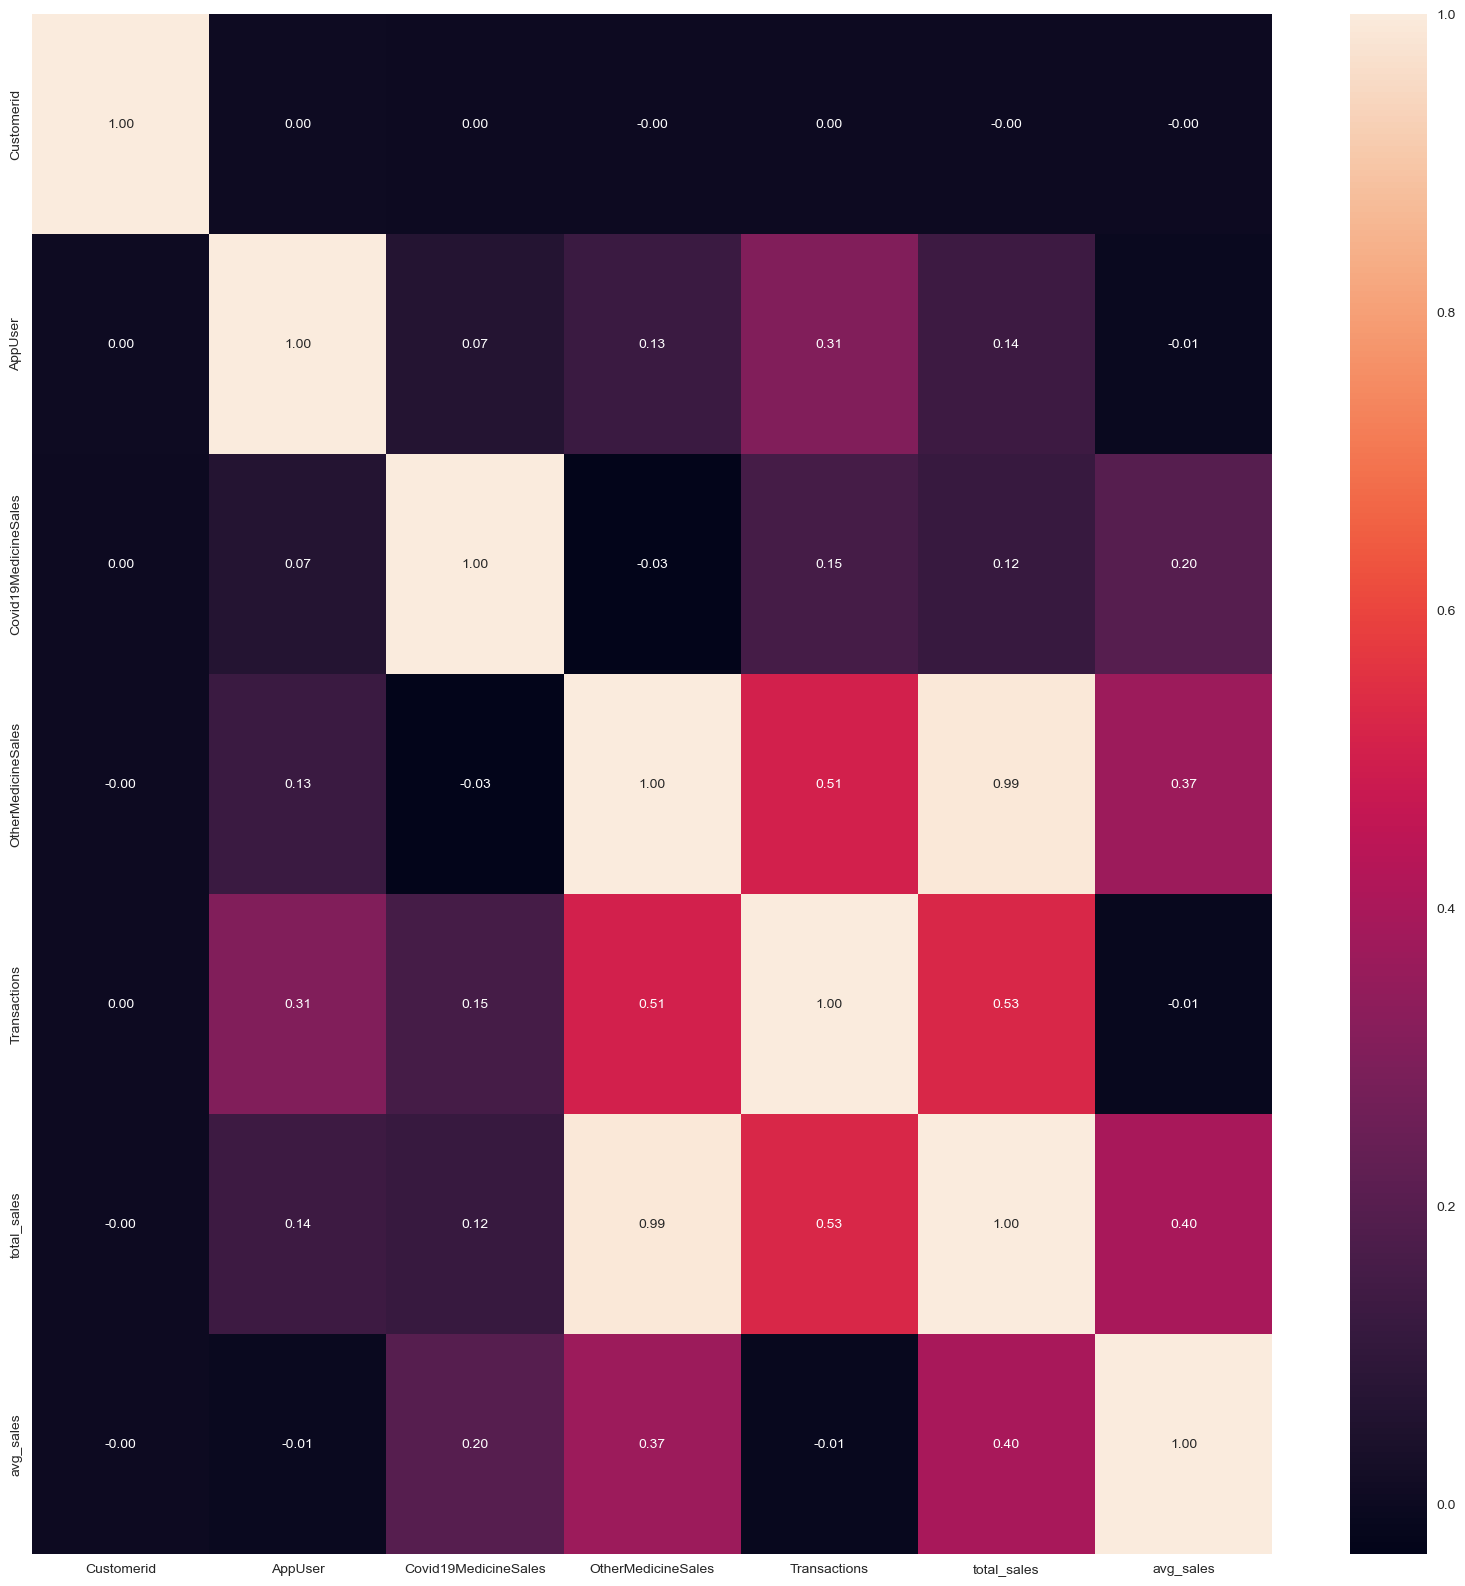

In [80]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

# --------------------------------------------------------------------------------------------------------------

# Insights:

- App usage pf women is higher than men

- Total sales are higher from store than compared with sales form App

- Medicine sales to men has higher average transaction value as compared to women

- Men are mere 27% of total of women and men

- Any of our customer has never used their loyalty points

- 96.4% dates of birth are system generated

- We have also noticed that people prefer to order from the app

- We saw that, be it covid medicines or other medicines, they were ordered a little more from the app

- Thus, company should run a campaign to onboard customers on the app and launching a store in cities where app usage is low     	would bring confidence in customers

- It was also noticed that customers tend to buy medicines on monday